In [54]:
class BasicPolicy:
    def __init__(self, pi):
        self.pi = [1 - pi, pi]
    def get_action(self):
        return np.random.choice(2, 1, p=self.pi)
    def get_n_actions(self):
        return 2

class StandardModel:
    ## Now the mean is a vector
    def __init__(self, mean):
        self.mean = mean
    def get_response(self, action):
        return np.random.normal(self.mean[action], 1)
    def Evaluate(self, policy, n_samples):
        hat_U = 0
        for t in range(n_samples):
            a = policy.get_action()
            y = self.get_response(a)
            hat_U += y
        return hat_U/n_samples

In [2]:
import numpy as np

In [3]:
policy = BasicPolicy(0.1)

In [4]:
theta = 0.1*np.random.normal(size=2)

In [5]:
theta

array([-0.14818559,  0.1074783 ])

In [6]:
model = StandardModel(theta)

In [7]:
policy.pi

[0.9, 0.1]

In [8]:
import pandas

In [26]:
N = 3000

In [27]:
data = pandas.DataFrame({'a': np.random.choice(2, N, p=policy.pi)})

In [28]:
data['y'] = data['a'].apply(model.get_response)

In [29]:
data.head()

,a,y
0,0,-0.839080
1,1,-0.646742
2,0,0.008019
3,0,-1.504514
4,0,0.791909


In [30]:
pi_hat = data.groupby('a').size() / data.shape[0]
pi_hat

a
0    0.905333
1    0.094667
dtype: float64

In [31]:
theta_hat = data.groupby('a')['y'].mean()
theta_hat

a
0   -0.175366
1    0.057371
Name: y, dtype: float64

In [32]:
model.mean

array([-0.14818559,  0.1074783 ])

In [33]:
data.groupby('a')['y'].std()

a
0    1.006841
1    0.934253
Name: y, dtype: float64

In [35]:
U_hat = data['y'].mean()
U_hat

-0.15333340771018014

In [37]:
%matplotlib inline

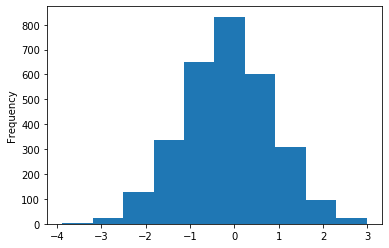

In [38]:
data['y'].plot.hist()

In [39]:
alt_pi = pandas.Series(np.zeros(policy.get_n_actions()))
alt_pi[theta_hat.values.argmax()] = 1

In [40]:
alt_pi

0    0.0
1    1.0
dtype: float64

In [43]:
data['a'].head()

0    0
1    1
2    0
3    0
4    0
Name: a, dtype: int64

In [45]:
data['a'].apply(lambda x: alt_pi[x]) # this is map!

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
2995    0.0
2996    1.0
2997    0.0
2998    0.0
2999    0.0
Name: a, Length: 3000, dtype: float64

In [41]:
data['a'].map(alt_pi)

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
2995    0.0
2996    1.0
2997    0.0
2998    0.0
2999    0.0
Name: a, Length: 3000, dtype: float64

In [46]:
U_hat_alt = (data['y'] * data['a'].map(alt_pi) / data['a'].map(pi_hat)).mean()
U_hat_alt

0.057371286510600174

In [47]:
U_hat

-0.15333340771018014

In [62]:
alt_policy = BasicPolicy(alt_pi[1])

In [63]:
model.Evaluate(alt_policy, 10000)

array([0.11656578])